# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
# Set up url and list to store
base_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_responses=[]
city_num = len(cities)
print('Starting Weather Queries')
print('-' * 40)
# For each city name generated, do an api call
for i, city in enumerate(cities):
    # query url, specifing imerial units
    query = base_url + "appid=" + weather_api_key + "&q=" + city +'&units=imperial'
    try :
        weather_response = requests.get(query).json()
    except:
        print("Error!")
    # If api call is sucess aka 200 response, record json into a list
    if weather_response['cod'] == 200:
        weather_responses.append(weather_response)
        print(f'Retrival success, processing record {i+1} out of {city_num}|{city}')
    # If failed aka 404 not found, print error message
    else:
        print('Retrival failed, City not found. Skipping...')
print(f'Weather queries over, total of {len(weather_reponses)} entries recorded')


port hedland
Retrival success, processing record 271 out of 611|akdepe
Retrival success, processing record 272 out of 611|hasaki
Retrival success, processing record 273 out of 611|portland
Retrival success, processing record 274 out of 611|takab
Retrival success, processing record 275 out of 611|aktash
Retrival success, processing record 276 out of 611|martapura
Retrival success, processing record 277 out of 611|saurimo
Retrival success, processing record 278 out of 611|turkan
Retrival success, processing record 279 out of 611|kalmunai
Retrival success, processing record 280 out of 611|bengkulu
Retrival failed, City not found. Skipping...
Retrival success, processing record 282 out of 611|monmouth
Retrival success, processing record 283 out of 611|edd
Retrival success, processing record 284 out of 611|alofi
Retrival success, processing record 285 out of 611|cap malheureux
Retrival failed, City not found. Skipping...
Retrival success, processing record 287 out of 611|heihe
Retrival succ

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# For each city's json, retrive desired data points and store into individual list, list operations faster than DataFrame
names, cloud, country, date, humid, lat, lng, m_temp, wind=[], [], [], [], [], [], [], [], []
for weather in weather_responses:
    names.append(weather['name'])
    cloud.append(weather['clouds']['all'])
    country.append(weather['sys']['country'])
    date.append(weather['dt'])
    humid.append(weather['main']['humidity'])
    lng.append(weather['coord']['lon'])
    lat.append(weather['coord']['lat'])
    m_temp.append(weather['main']['temp_max'])
    wind.append(weather['wind']['speed'])
# Construct a data frame using the list generated
weather_df = pd.DataFrame({'City':names,
                            'Cloudiness':cloud,
                            'Country':country,
                            'Date':date,
                            'Humidity':humid,
                            'Lat':lat,
                            'Lng':lng,
                            'Max Temp':m_temp,
                            'Wind Speed':wind
                            })
weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [45]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Totma,100,RU,1581512691,97,59.97,42.76,32.74,9.84
1,Cabo San Lucas,4,MX,1581512680,85,22.89,-109.91,51.01,5.32
2,Wonthaggi,0,AU,1581512691,91,-38.60,145.59,68.00,8.01
3,Norman Wells,40,CA,1581512691,82,65.28,-126.83,-16.60,6.93
4,Puerto Ayora,20,EC,1581512692,78,-0.74,-90.35,78.80,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

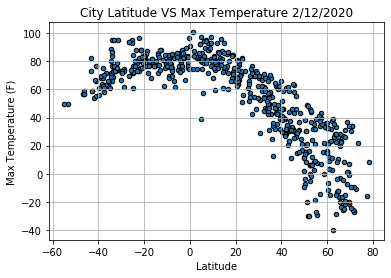

In [44]:
weather_df.plot.scatter('Lat','Max Temp',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude VS Max Temperature 2/12/2020")
plt.grid()
plt.savefig("./Images/Max Temp.png")
# Plots temperatrue and latitude columns from data frame using plot() method
# Add titles and labels using matplotlib and saves the figure to Images
# Farther away from the equator will result in lower temperatures

#### Latitude vs. Humidity Plot

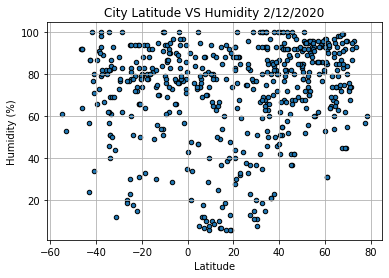

In [46]:
weather_df.plot.scatter('Lat','Humidity',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude VS Humidity 2/12/2020")
plt.grid()
plt.savefig("./Images/Humidity.png")
# Plots humidity and latitude columns from data frame using plot() method
# Add titles and labels using matplotlib and saves the figure to Images
# Weak correlation between higher latitude and higher humidity 

#### Latitude vs. Cloudiness Plot

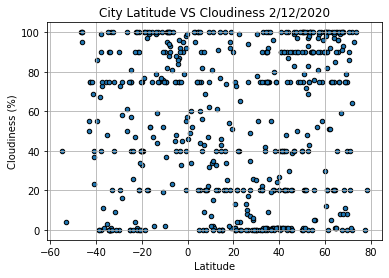

In [47]:
weather_df.plot.scatter('Lat','Cloudiness',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude VS Cloudiness 2/12/2020")
plt.grid()
plt.savefig("./Images/Cloudiness.png")
# Plots cloudiness and latitude columns from data frame using plot() method
# Add titles and labels using matplotlib and saves the figure to Images
# There seems to be very little correlation between latitude and cloudiness

#### Latitude vs. Wind Speed Plot

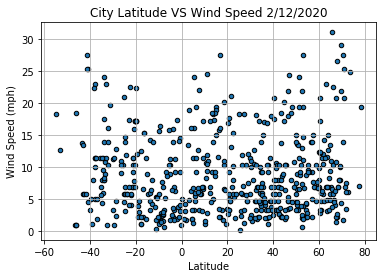

In [48]:
weather_df.plot.scatter('Lat','Wind Speed',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude VS Wind Speed 2/12/2020")
plt.grid()
plt.savefig("./Images/Wind Speed.png")
# Plots wind speed and latitude columns from data frame using plot() method
# Add titles and labels using matplotlib and saves the figure to Images
# There seems to be very little correlation between latitude and wind speed

## Linear Regression

In [58]:
# OPTIONAL: Create a function to create Linear Regression plots
def optional_line(x, y):
    # Function that takes in 2 panda series x, y and plots a linear regression line
    slope, inter, rval, pval, stderr = linregress(x, y)
    print(f'The r-squared is : {rval ** 2}')
    x_line = np.arange(x.min(),x.max()+1,1)
    y_line = (slope * x_line) + inter
    plt.plot(x_line, y_line, 'r',label = 'y = {0:.3f}x + {1:.3f}'.format(slope,inter))
    # Using legned label to annotate because it can use best location
    plt.legend(loc='best')
    

In [73]:
# Create Northern and Southern Hemisphere DataFrames
# If lat is 0, city will be consider in the north
north_df = weather_df.loc[weather_df['Lat']>=0]
south_df = weather_df.loc[weather_df['Lat']<0]
south_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Wonthaggi,0,AU,1581512691,91,-38.60,145.59,68.00,8.01
4,Puerto Ayora,20,EC,1581512692,78,-0.74,-90.35,78.80,9.17
9,Bambous Virieux,40,MU,1581512693,79,-20.34,57.76,84.20,17.22
12,Hermanus,0,ZA,1581512693,46,-34.42,19.23,89.01,5.99
13,Chimbote,95,PE,1581512693,86,-9.09,-78.58,69.85,2.77


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7525608539418562


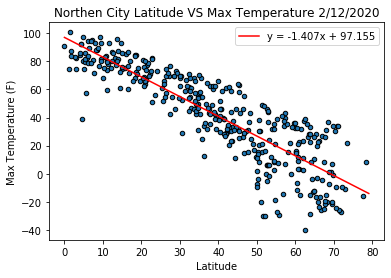

In [63]:
north_df.plot.scatter('Lat','Max Temp',marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northen City Latitude VS Max Temperature 2/12/2020")
optional_line(north_df["Lat"],north_df['Max Temp'])
plt.savefig("./Images/Max Temp North.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.24540988622779933


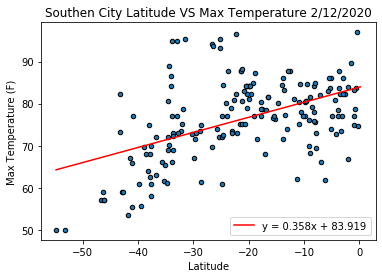

In [65]:
south_df.plot.scatter('Lat','Max Temp',marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southen City Latitude VS Max Temperature 2/12/2020")
optional_line(south_df["Lat"],south_df['Max Temp'])
plt.savefig("./Images/Max Temp South.png")

# The linear regression is trying to figure out if there is a linear relationship between latitude and temperature
# There seems to be strong linear correlation, especially for northern cities 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1353480581638613


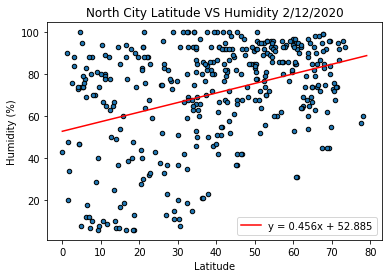

In [67]:
north_df.plot.scatter('Lat','Humidity',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("North City Latitude VS Humidity 2/12/2020")
optional_line(north_df["Lat"],north_df['Humidity'])
plt.savefig("./Images/Humidity North.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.014200431140230303


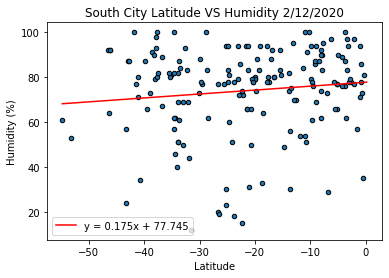

In [68]:
south_df.plot.scatter('Lat','Humidity',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("South City Latitude VS Humidity 2/12/2020")
optional_line(south_df["Lat"],south_df['Humidity'])
plt.savefig("./Images/Humidity South.png")

# The linear regression is trying to figure out if there is a linear relationship between latitude and humidity
# There seems to be very weak linear correlation, especially for southern cities

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.05199131384092331


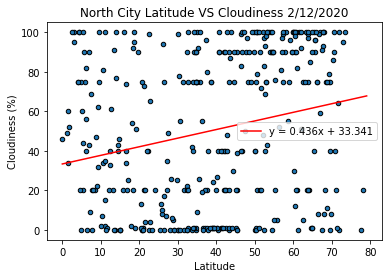

In [74]:
north_df.plot.scatter('Lat','Cloudiness',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("North City Latitude VS Cloudiness 2/12/2020")
optional_line(north_df["Lat"],north_df['Cloudiness'])
plt.savefig("./Images/Cloudiness North.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08268568837525234


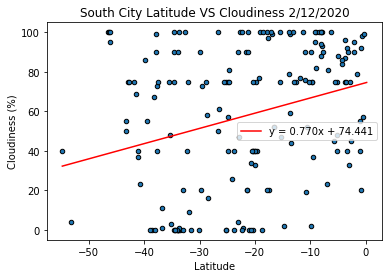

In [72]:
south_df.plot.scatter('Lat','Cloudiness',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("South City Latitude VS Cloudiness 2/12/2020")
optional_line(south_df["Lat"],south_df['Cloudiness'])
plt.savefig("./Images/Cloudiness South.png")

# The linear regression is trying to figure out if there is a linear relationship between latitude and cloudiness
# There seems to be very weak linear correlation in both hemispheres

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.004661488516532187


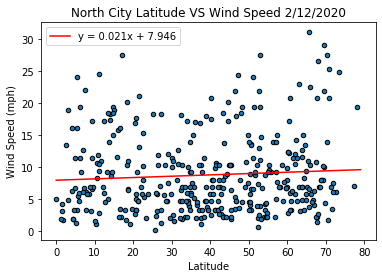

In [76]:
north_df.plot.scatter('Lat','Wind Speed',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("North City Latitude VS Wind Speed 2/12/2020")
optional_line(north_df["Lat"],north_df['Wind Speed'])
plt.savefig("./Images/Wind Speed North.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07338949192661809


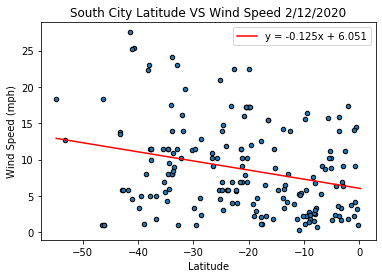

In [75]:
south_df.plot.scatter('Lat','Wind Speed',marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("South City Latitude VS Wind Speed 2/12/2020")
optional_line(south_df["Lat"],south_df['Wind Speed'])
plt.savefig("./Images/Wind Speed South.png")

# The linear regression is trying to figure out if there is a linear relationship between latitude and wind speed
# There seems to be almost no linear correlation in both hemispheres

In [77]:
# Saving data frames to csv
weather_df.to_csv('./output_data/city_weather_data.csv')